## Problem Statement
#### Focusing on key metrics such as the number of calls answered, call duration, and overall customer satisfaction.
#### Overview of long-term agent behaviour.
#### Customer satisfaction levels. 
#### Call centre's performance

In [75]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Reading call data
call_data=pd.read_csv('Call_Center_Data_MX0214.xlsx - call data.csv')
call_data.head()

,call_id,call_date_time,dialed_phone,call_status_id,agent_id,source_id,customer_name,city,gender,email,length_in_sec,channel,list_id,call attempts,lead_id,lead creation date,connected (yes/ no),satisfaction rating,hold_time_sec
0,95094257,5/26/21 9:29,9015181XX,181943,10021,NaN,vipin,NaN,U,NaN,45.0,1101_Social,1335,1,57500574,25-May-21,1,5,31
1,93251111,5/26/21 9:31,8447109XX,181943,10024,NaN,NaN,NaN,U,NaN,10.0,1101_Social,1335,7,57501045,8-Mar-21,1,5,2
2,85852925,5/26/21 9:33,9425006XX,181943,10024,NaN,NaN,NaN,U,NaN,31.0,1101_Social,1335,1,57501336,26-May-21,1,5,27
3,89920387,5/26/21 9:34,9454044XX,181943,10020,6480491.0,Manoj,Noida,U,NaN,0.0,1101_Social,1151,5,57494894,24-May-21,1,5,0
4,99824473,5/26/21 9:39,9799990XX,181943,10024,6265046.0,NaN,New Delhi,U,NaN,47.0,1101_Social,1258,2,56501101,10-Mar-21,1,5,36


In [77]:
# Dropping irrelevant columns
call_data.drop(['dialed_phone', 'customer_name', 'email'], axis=1, inplace=True)

In [78]:
call_data.columns

Index(['call_id', 'call_date_time', 'call_status_id', 'agent_id', 'source_id',
       'city', 'gender', 'length_in_sec', 'channel', 'list_id',
       'call attempts ', 'lead_id', 'lead creation date',
       'connected (yes/ no)', 'satisfaction rating', 'hold_time_sec'],
      dtype='object')

In [79]:
# Reading call agent

agent=pd.read_csv('Call_Center_Data_MX0214.xlsx - agent.csv')
agent.head()

,agent_id,first name,last name,gender
0,10001,Aarav,Patel,Male
1,10002,Aditiya,Sharma,Male
2,10003,Alok,Verma,Male
3,10004,Aniket,Das,Male
4,10005,Arjun,Kapoor,Male


In [80]:
# Reading list data

call_list=pd.read_csv('Call_Center_Data_MX0214.xlsx - list.csv')
call_list.head()

,list_id,list_name
0,1151,Queue Algo 1
1,1196,South1 Regional List
2,1258,Queue Algo 2
3,1335,ManualList1
4,1395,Other Pan India


In [81]:
# Reading call status data
call_status=pd.read_csv('Call_Center_Data_MX0214.xlsx - call_status.csv')
call_status.head()

,status_id,status Code,status_name
0,158962,DROP,Agent Not Available
1,63594,APRD,Already Product Purchased
2,42103,BLCK,Blocked Number
3,181943,CLBK,Call Back Request
4,91334,CDRP,Call Dropped


## Merging data

In [82]:
#merging agent data on agent id
df=pd.merge(call_data, agent, on= ['agent_id'], how='left')
df.head().T

,0,1,2,3,4
call_id,95094257,93251111,85852925,89920387,99824473
call_date_time,5/26/21 9:29,5/26/21 9:31,5/26/21 9:33,5/26/21 9:34,5/26/21 9:39
call_status_id,181943,181943,181943,181943,181943
agent_id,10021,10024,10024,10020,10024
source_id,NaN,NaN,NaN,6480491.0,6265046.0
city,NaN,NaN,NaN,Noida,New Delhi
gender_x,U,U,U,U,U
length_in_sec,45.0,10.0,31.0,0.0,47.0
channel,1101_Social,1101_Social,1101_Social,1101_Social,1101_Social
list_id,1335,1335,1335,1151,1258


In [83]:
df.columns

Index(['call_id', 'call_date_time', 'call_status_id', 'agent_id', 'source_id',
       'city', 'gender_x', 'length_in_sec', 'channel', 'list_id',
       'call attempts ', 'lead_id', 'lead creation date',
       'connected (yes/ no)', 'satisfaction rating', 'hold_time_sec',
       'first name', 'last name', 'gender_y'],
      dtype='object')

In [84]:
#Merging List data
df2= pd.merge(df, call_list, on= ['list_id'], how='left')

In [85]:
df2.columns

Index(['call_id', 'call_date_time', 'call_status_id', 'agent_id', 'source_id',
       'city', 'gender_x', 'length_in_sec', 'channel', 'list_id',
       'call attempts ', 'lead_id', 'lead creation date',
       'connected (yes/ no)', 'satisfaction rating', 'hold_time_sec',
       'first name', 'last name', 'gender_y', 'list_name'],
      dtype='object')

In [86]:
# Renaming column
df2.rename(columns={'call_status_id': 'status_id'}, inplace=True)

In [87]:
df2.head()

,call_id,call_date_time,status_id,agent_id,source_id,city,gender_x,length_in_sec,channel,list_id,call attempts,lead_id,lead creation date,connected (yes/ no),satisfaction rating,hold_time_sec,first name,last name,gender_y,list_name
0,95094257,5/26/21 9:29,181943,10021,NaN,NaN,U,45.0,1101_Social,1335,1,57500574,25-May-21,1,5,31,Rajat,Gupta,Male,ManualList1
1,93251111,5/26/21 9:31,181943,10024,NaN,NaN,U,10.0,1101_Social,1335,7,57501045,8-Mar-21,1,5,2,Roshni,Prasad,Female,ManualList1
2,85852925,5/26/21 9:33,181943,10024,NaN,NaN,U,31.0,1101_Social,1335,1,57501336,26-May-21,1,5,27,Roshni,Prasad,Female,ManualList1
3,89920387,5/26/21 9:34,181943,10020,6480491.0,Noida,U,0.0,1101_Social,1151,5,57494894,24-May-21,1,5,0,Pooja,Bhatia,Female,Queue Algo 1
4,99824473,5/26/21 9:39,181943,10024,6265046.0,New Delhi,U,47.0,1101_Social,1258,2,56501101,10-Mar-21,1,5,36,Roshni,Prasad,Female,Queue Algo 2


In [88]:
#merging call status 
df_merge= pd.merge(df2, call_status, on=['status_id'], how='inner')

In [89]:
df_merge.head().T

,0,1,2,3,4
call_id,95094257,93251111,85852925,89920387,99824473
call_date_time,5/26/21 9:29,5/26/21 9:31,5/26/21 9:33,5/26/21 9:34,5/26/21 9:39
status_id,181943,181943,181943,181943,181943
agent_id,10021,10024,10024,10020,10024
source_id,NaN,NaN,NaN,6480491.0,6265046.0
city,NaN,NaN,NaN,Noida,New Delhi
gender_x,U,U,U,U,U
length_in_sec,45.0,10.0,31.0,0.0,47.0
channel,1101_Social,1101_Social,1101_Social,1101_Social,1101_Social
list_id,1335,1335,1335,1151,1258


In [90]:
df_merge.columns

Index(['call_id', 'call_date_time', 'status_id', 'agent_id', 'source_id',
       'city', 'gender_x', 'length_in_sec', 'channel', 'list_id',
       'call attempts ', 'lead_id', 'lead creation date',
       'connected (yes/ no)', 'satisfaction rating', 'hold_time_sec',
       'first name', 'last name', 'gender_y', 'list_name', 'status Code',
       'status_name'],
      dtype='object')

In [91]:
df_merge.shape

(10580, 22)

In [92]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 10579
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   call_id              10580 non-null  int64  
 1   call_date_time       10580 non-null  object 
 2   status_id            10580 non-null  int64  
 3   agent_id             10580 non-null  int64  
 4   source_id            10465 non-null  float64
 5   city                 8518 non-null   object 
 6   gender_x             5755 non-null   object 
 7   length_in_sec        10573 non-null  float64
 8   channel              10580 non-null  object 
 9   list_id              10580 non-null  int64  
 10  call attempts        10580 non-null  int64  
 11  lead_id              10580 non-null  int64  
 12  lead creation date   10580 non-null  object 
 13  connected (yes/ no)  10580 non-null  int64  
 14  satisfaction rating  10580 non-null  int64  
 15  hold_time_sec        10580 non-null 

## Cleaning Data

In [93]:
# Renaming gender columns
df_merge.rename(columns={'gender_x': 'cust_gender', 'gender_y':'agent_gender', 'connected (yes/ no)':'connected','satisfaction rating':'Satisfaction' }, inplace=True)

In [94]:
df_merge.columns

Index(['call_id', 'call_date_time', 'status_id', 'agent_id', 'source_id',
       'city', 'cust_gender', 'length_in_sec', 'channel', 'list_id',
       'call attempts ', 'lead_id', 'lead creation date', 'connected',
       'Satisfaction', 'hold_time_sec', 'first name', 'last name',
       'agent_gender', 'list_name', 'status Code', 'status_name'],
      dtype='object')

In [95]:
#Dealing with date time column

df_merge['call_date_time'] = pd.to_datetime(df_merge['call_date_time'], format='%m/%d/%y %H:%M')
df_merge['call_date_time']

0       2021-05-26 09:29:00
1       2021-05-26 09:31:00
2       2021-05-26 09:33:00
3       2021-05-26 09:34:00
4       2021-05-26 09:39:00
                ...        
10575   2021-05-18 16:45:00
10576   2021-05-18 16:45:00
10577   2021-05-18 16:45:00
10578   2021-05-18 16:46:00
10579   2021-05-18 16:46:00
Name: call_date_time, Length: 10580, dtype: datetime64[ns]

In [96]:
import pandas as pd

# Assuming df_merge is your DataFrame
df_merge['call_date_time'] = pd.to_datetime(df_merge['call_date_time'])

# Extract date and time components into separate columns
df_merge['call_date'] = df_merge['call_date_time'].dt.date
df_merge['call_time'] = df_merge['call_date_time'].dt.time

# Display the DataFrame with the new date and time columns
print(df_merge)


        call_id      call_date_time  status_id  agent_id  source_id  \
0      95094257 2021-05-26 09:29:00     181943     10021        NaN   
1      93251111 2021-05-26 09:31:00     181943     10024        NaN   
2      85852925 2021-05-26 09:33:00     181943     10024        NaN   
3      89920387 2021-05-26 09:34:00     181943     10020  6480491.0   
4      99824473 2021-05-26 09:39:00     181943     10024  6265046.0   
...         ...                 ...        ...       ...        ...   
10575  88248860 2021-05-18 16:45:00     221165     99999  6247956.0   
10576  91325965 2021-05-18 16:45:00     221165     99999  6247923.0   
10577  92561648 2021-05-18 16:45:00     221165     99999  6247553.0   
10578  96707059 2021-05-18 16:46:00     221165     99999  6398982.0   
10579  92433060 2021-05-18 16:46:00     221165     99999  6412623.0   

            city cust_gender  length_in_sec           channel  list_id  ...  \
0            NaN           U           45.0       1101_Social     13

In [97]:
df_merge.drop(['call_date_time'],axis=1, inplace=True)

In [98]:
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

df_merge['call_in_seconds'] = df_merge['call_time'].apply(time_to_seconds)

print(df_merge)

        call_id  status_id  agent_id  source_id       city cust_gender  \
0      95094257     181943     10021        NaN        NaN           U   
1      93251111     181943     10024        NaN        NaN           U   
2      85852925     181943     10024        NaN        NaN           U   
3      89920387     181943     10020  6480491.0      Noida           U   
4      99824473     181943     10024  6265046.0  New Delhi           U   
...         ...        ...       ...        ...        ...         ...   
10575  88248860     221165     99999  6247956.0        NaN         NaN   
10576  91325965     221165     99999  6247923.0        NaN         NaN   
10577  92561648     221165     99999  6247553.0        NaN         NaN   
10578  96707059     221165     99999  6398982.0        NaN         NaN   
10579  92433060     221165     99999  6412623.0        NaN         NaN   

       length_in_sec           channel  list_id  call attempts   ...  \
0               45.0       1101_Social 

In [99]:
# Renaming columns
df_merge.rename(columns={'lead creation date':'lead_creation_date', 'status Code':'status_Code'}, inplace=True)

In [100]:
import pandas as pd


df_merge['lead_creation_date'] = pd.to_datetime(df_merge['lead_creation_date'], format='%d-%b-%y')
df_merge['lead_date'] = df_merge['lead_creation_date'].dt.date
df_merge['lead_time'] = df_merge['lead_creation_date'].dt.time
# Display the DataFrame with the new "lead_date" column
print(df_merge)

        call_id  status_id  agent_id  source_id       city cust_gender  \
0      95094257     181943     10021        NaN        NaN           U   
1      93251111     181943     10024        NaN        NaN           U   
2      85852925     181943     10024        NaN        NaN           U   
3      89920387     181943     10020  6480491.0      Noida           U   
4      99824473     181943     10024  6265046.0  New Delhi           U   
...         ...        ...       ...        ...        ...         ...   
10575  88248860     221165     99999  6247956.0        NaN         NaN   
10576  91325965     221165     99999  6247923.0        NaN         NaN   
10577  92561648     221165     99999  6247553.0        NaN         NaN   
10578  96707059     221165     99999  6398982.0        NaN         NaN   
10579  92433060     221165     99999  6412623.0        NaN         NaN   

       length_in_sec           channel  list_id  call attempts   ...  \
0               45.0       1101_Social 

In [101]:
df_merge.drop(['lead_time', 'lead_creation_date'],axis=1, inplace=True)

In [102]:
df_merge.isnull().sum()

call_id               0
status_id             0
agent_id              0
source_id           115
city               2062
cust_gender        4825
length_in_sec         7
channel               0
list_id               0
call attempts         0
lead_id               0
connected             0
Satisfaction          0
hold_time_sec         0
first name            0
last name          5709
agent_gender       5709
list_name             0
status_Code           0
status_name           0
call_date             0
call_time             0
call_in_seconds       0
lead_date             0
dtype: int64

In [103]:
df_merge.head()

,call_id,status_id,agent_id,source_id,city,cust_gender,length_in_sec,channel,list_id,call attempts,...,first name,last name,agent_gender,list_name,status_Code,status_name,call_date,call_time,call_in_seconds,lead_date
0,95094257,181943,10021,NaN,NaN,U,45.0,1101_Social,1335,1,...,Rajat,Gupta,Male,ManualList1,CLBK,Call Back Request,2021-05-26,09:29:00,34140,2021-05-25
1,93251111,181943,10024,NaN,NaN,U,10.0,1101_Social,1335,7,...,Roshni,Prasad,Female,ManualList1,CLBK,Call Back Request,2021-05-26,09:31:00,34260,2021-03-08
2,85852925,181943,10024,NaN,NaN,U,31.0,1101_Social,1335,1,...,Roshni,Prasad,Female,ManualList1,CLBK,Call Back Request,2021-05-26,09:33:00,34380,2021-05-26
3,89920387,181943,10020,6480491.0,Noida,U,0.0,1101_Social,1151,5,...,Pooja,Bhatia,Female,Queue Algo 1,CLBK,Call Back Request,2021-05-26,09:34:00,34440,2021-05-24
4,99824473,181943,10024,6265046.0,New Delhi,U,47.0,1101_Social,1258,2,...,Roshni,Prasad,Female,Queue Algo 2,CLBK,Call Back Request,2021-05-26,09:39:00,34740,2021-03-10


In [104]:
df_merge.isnull().sum()/len(df_merge)*100

call_id             0.000000
status_id           0.000000
agent_id            0.000000
source_id           1.086957
city               19.489603
cust_gender        45.604915
length_in_sec       0.066163
channel             0.000000
list_id             0.000000
call attempts       0.000000
lead_id             0.000000
connected           0.000000
Satisfaction        0.000000
hold_time_sec       0.000000
first name          0.000000
last name          53.960302
agent_gender       53.960302
list_name           0.000000
status_Code         0.000000
status_name         0.000000
call_date           0.000000
call_time           0.000000
call_in_seconds     0.000000
lead_date           0.000000
dtype: float64

## Finding Mode

In [105]:
cust_gender=df_merge.cust_gender.mode()[0]
cust_gender

'U'

In [106]:
agent_gender=df_merge.agent_gender.mode()[0]
agent_gender

'Male'

In [107]:
city=df_merge.city.mode()[0]
city

'New Delhi'

## Treating Nulls

In [108]:
#Dropping Cust_gender column and last name column and first name 
df_merge.drop(['cust_gender', 'last name', 'first name'], axis=1, inplace=True )

In [109]:
# Replacing null values with mode for city and agent_gender.
df_merge.agent_gender.fillna(agent_gender,inplace=True)
df_merge.agent_gender.value_counts(normalize=True)

Male      0.825236
Female    0.174764
Name: agent_gender, dtype: float64

In [110]:
df_merge.city.fillna(city,inplace=True)
df_merge.city.value_counts(normalize=True)

New Delhi    0.501985
Mumbai       0.113043
Bangalore    0.100000
Delhi NCR    0.074386
Gurgaon      0.049905
               ...   
Dombivli     0.000095
Tiruppur     0.000095
Belgaum      0.000095
Rewa         0.000095
Kaithal      0.000095
Name: city, Length: 90, dtype: float64

In [111]:
df_merge.dropna(subset=['length_in_sec'], inplace=True)

In [112]:
df_merge.isnull().sum()

call_id              0
status_id            0
agent_id             0
source_id          115
city                 0
length_in_sec        0
channel              0
list_id              0
call attempts        0
lead_id              0
connected            0
Satisfaction         0
hold_time_sec        0
agent_gender         0
list_name            0
status_Code          0
status_name          0
call_date            0
call_time            0
call_in_seconds      0
lead_date            0
dtype: int64

In [113]:
# have removed 64 records that has call status as “test”
df_merge['status_name'].value_counts()

No Answer AutoDial           5554
Hangup                       3219
Call Back Request             962
Intrested Prospect            268
Call Dropped                  104
Agent Not Available            97
Not Interested                 80
test                           64
Temporay, Number Closed        58
Preference Not Available       52
Voice Not Clear                35
Lead Being Called              22
Already Product Purchased      18
Walking/ Travelling            16
Language Alternate             14
Out of City/ Travelling         3
Wrong Number                    3
Dealer Call Check               2
Blocked Number                  1
Plan Postponed                  1
Name: status_name, dtype: int64

In [114]:
df_merge = df_merge[df_merge['status_name'] != 'test']

In [115]:
df_merge['status_name'].value_counts()

No Answer AutoDial           5554
Hangup                       3219
Call Back Request             962
Intrested Prospect            268
Call Dropped                  104
Agent Not Available            97
Not Interested                 80
Temporay, Number Closed        58
Preference Not Available       52
Voice Not Clear                35
Lead Being Called              22
Already Product Purchased      18
Walking/ Travelling            16
Language Alternate             14
Out of City/ Travelling         3
Wrong Number                    3
Dealer Call Check               2
Blocked Number                  1
Plan Postponed                  1
Name: status_name, dtype: int64

## Univariate Analysis

In [116]:
df_merge.city.value_counts(normalize=True)

New Delhi    0.501475
Mumbai       0.113522
Bangalore    0.100390
Delhi NCR    0.074698
Gurgaon      0.049957
               ...   
Dombivli     0.000095
Tiruppur     0.000095
Belgaum      0.000095
Rewa         0.000095
Kaithal      0.000095
Name: city, Length: 90, dtype: float64

In [117]:
df_merge.channel.value_counts(normalize=True)

1256_Advertising    0.758493
1101_Social         0.241507
Name: channel, dtype: float64

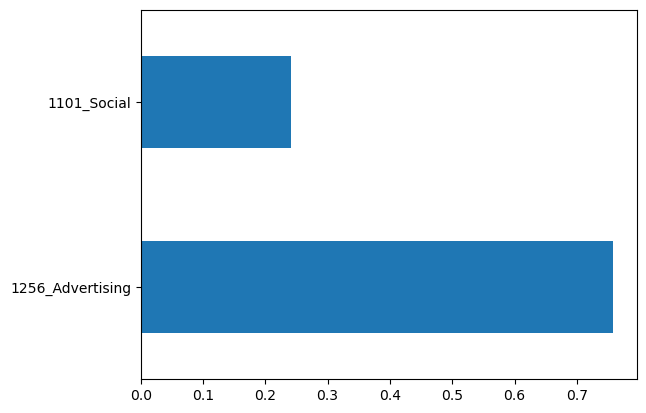

In [118]:
df_merge.channel.value_counts(normalize=True).plot(kind='barh')

plt.show()

In [119]:
df_merge.connected.value_counts(normalize=True)


0    0.543249
1    0.456751
Name: connected, dtype: float64

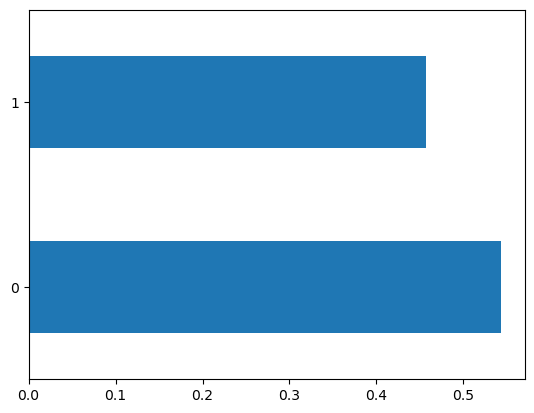

In [120]:
df_merge.connected.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [121]:
df_merge.Satisfaction.value_counts(normalize=True)

0    0.543249
4    0.094395
2    0.092873
3    0.090970
1    0.089542
5    0.088971
Name: Satisfaction, dtype: float64

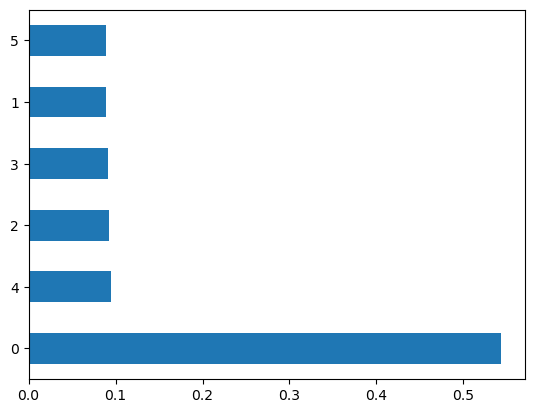

In [122]:
df_merge.Satisfaction.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [123]:
df_merge.agent_gender.value_counts(normalize=True)

Male      0.827767
Female    0.172233
Name: agent_gender, dtype: float64

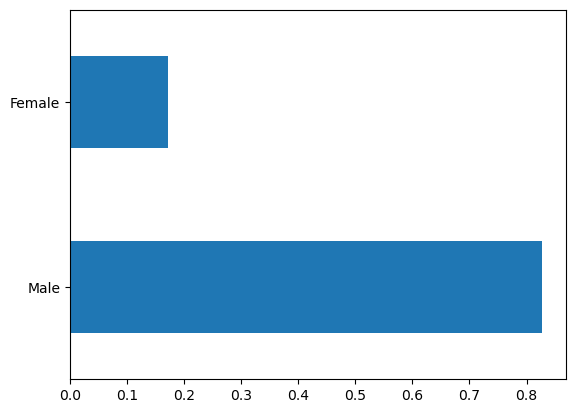

In [124]:
df_merge.agent_gender.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [125]:
df_merge.list_name.value_counts(normalize=True)

L2 Level List           0.755543
Queue Algo 2            0.113617
South1 Regional List    0.066039
Queue Algo 1            0.048244
ManualList1             0.008754
Other Pan India         0.004853
DS List                 0.001713
ManualList2             0.000571
Mumbai Zone List        0.000285
NCR List                0.000190
Hindi IVR List          0.000190
Name: list_name, dtype: float64

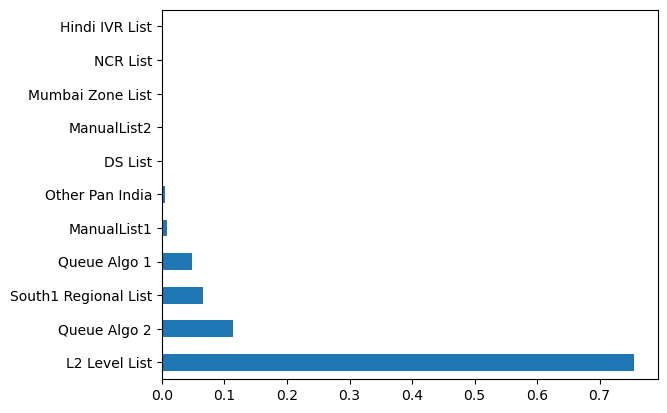

In [126]:
df_merge.list_name.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [127]:
df_merge.status_name.value_counts(normalize=True)

No Answer AutoDial           0.528499
Hangup                       0.306309
Call Back Request            0.091541
Intrested Prospect           0.025502
Call Dropped                 0.009896
Agent Not Available          0.009230
Not Interested               0.007613
Temporay, Number Closed      0.005519
Preference Not Available     0.004948
Voice Not Clear              0.003330
Lead Being Called            0.002093
Already Product Purchased    0.001713
Walking/ Travelling          0.001523
Language Alternate           0.001332
Out of City/ Travelling      0.000285
Wrong Number                 0.000285
Dealer Call Check            0.000190
Blocked Number               0.000095
Plan Postponed               0.000095
Name: status_name, dtype: float64

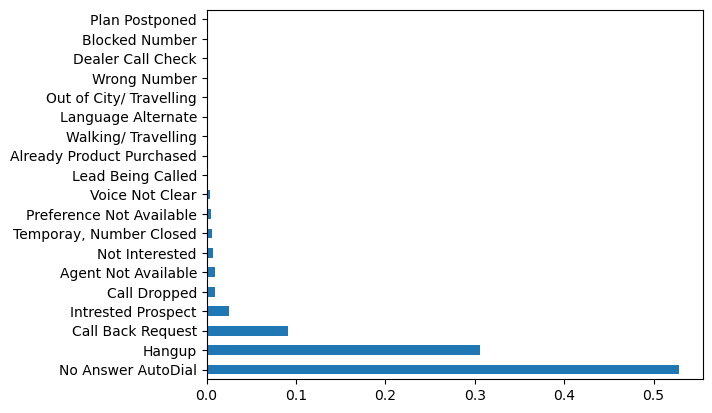

In [128]:
df_merge.status_name.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [129]:
df_merge.rename({'call attempts':'call_attempts'}, axis=1, inplace=True)

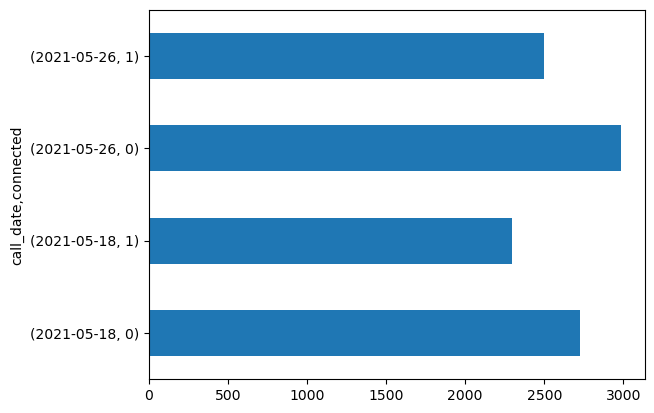

In [130]:
# Checking how many calls were connected on a particular date.
df_merge.groupby('call_date')['connected'].value_counts().plot(kind='barh')
plt.show()


In [133]:
df_merge['length_in_sec'].describe()

count    10509.000000
mean        50.384432
std        130.906221
min          0.000000
25%          0.000000
50%          0.000000
75%         37.000000
max       2208.000000
Name: length_in_sec, dtype: float64

In [134]:
df_merge.head().T

,0,1,2,3,4
call_id,95094257,93251111,85852925,89920387,99824473
status_id,181943,181943,181943,181943,181943
agent_id,10021,10024,10024,10020,10024
source_id,NaN,NaN,NaN,6480491.0,6265046.0
city,New Delhi,New Delhi,New Delhi,Noida,New Delhi
length_in_sec,45.0,10.0,31.0,0.0,47.0
channel,1101_Social,1101_Social,1101_Social,1101_Social,1101_Social
list_id,1335,1335,1335,1151,1258
call attempts,1,7,1,5,2
lead_id,57500574,57501045,57501336,57494894,56501101


In [135]:
target_rating = 4

# Find agents who achieved the target rating
agents_above_target = []
for index, row in df_merge.iterrows():
    if row['Satisfaction'] >= target_rating:
        agents_above_target.append(row['agent_id'])
if agents_above_target:
    agents_list = ', '.join(str(agent_id) for agent_id in agents_above_target)
    print(f"Agent(s) {agents_list} achieved the target satisfaction rating of at least {target_rating}")
else:
    print(f"No agents achieved the target satisfaction rating of at least {target_rating}")

Agent(s) 10021, 10024, 10024, 10020, 10024, 10016, 10030, 10016, 10024, 10024, 10024, 10028, 10041, 10020, 10030, 10016, 10020, 10028, 10041, 10024, 10042, 10016, 10028, 10041, 10009, 10028, 10041, 10028, 10018, 10031, 10024, 10041, 10042, 10042, 10024, 10009, 10042, 10024, 10010, 10032, 10030, 10032, 10019, 10002, 10021, 10031, 10030, 10041, 10016, 10025, 10042, 10042, 10030, 10018, 10030, 10025, 10041, 10005, 10041, 10031, 10018, 10024, 10032, 10024, 10018, 10024, 10028, 10031, 10021, 10021, 10028, 10030, 10018, 10010, 10028, 10030, 10032, 10020, 10032, 10028, 10042, 10041, 10028, 10020, 10041, 10025, 10021, 10018, 10031, 10024, 10024, 10030, 10002, 10028, 10031, 10030, 10028, 10041, 10031, 10031, 10018, 10030, 10015, 10028, 10030, 10013, 10030, 10021, 10018, 10040, 10024, 10005, 10032, 10025, 10020, 10005, 10041, 10024, 10024, 10021, 10015, 10030, 10031, 10030, 10013, 10018, 10021, 10020, 10031, 10028, 10024, 10016, 10023, 10028, 10024, 10034, 10024, 10024, 10024, 10016, 10034, 1003

In [136]:
def calculate_aht(row):
    return (row['length_in_sec'] + row['hold_time_sec']) / row['call_in_seconds']

# Apply the AHT calculation to the DataFrame
df_merge['aht'] = df_merge.apply(calculate_aht, axis=1)

# Calculate the average AHT across all agents
average_aht = df_merge['aht'].mean()

print(df_merge)
print("Average AHT:", average_aht)






        call_id  status_id  agent_id  source_id       city  length_in_sec  \
0      95094257     181943     10021        NaN  New Delhi           45.0   
1      93251111     181943     10024        NaN  New Delhi           10.0   
2      85852925     181943     10024        NaN  New Delhi           31.0   
3      89920387     181943     10020  6480491.0      Noida            0.0   
4      99824473     181943     10024  6265046.0  New Delhi           47.0   
...         ...        ...       ...        ...        ...            ...   
10575  88248860     221165     99999  6247956.0  New Delhi            0.0   
10576  91325965     221165     99999  6247923.0  New Delhi            0.0   
10577  92561648     221165     99999  6247553.0  New Delhi            0.0   
10578  96707059     221165     99999  6398982.0  New Delhi            0.0   
10579  92433060     221165     99999  6412623.0  New Delhi            0.0   

                channel  list_id  call attempts    lead_id  ...  \
0       

In [137]:


#There is no column named as ‘after call work in sec’ hence considering it zero in further analysis.

#All the conversation here are of call nature , there is no label  to identify the ‘chat’ type conversations
#Have excluded the Satisfaction Rating 0 from calculations- it doesn't make sense with the call status - ‘Agent Not Available’,’No Answer AutoDial’,’Temporary, Number Closed’ 

#The unique statuses in the "Not Connected" calls category are:- 'Agent Not Available'.'No Answer AutoDial','Temporary, Number Closed'


## Multivariate Analysis

In [142]:
df_merge.head().T

,0,1,2,3,4
call_id,95094257,93251111,85852925,89920387,99824473
status_id,181943,181943,181943,181943,181943
agent_id,10021,10024,10024,10020,10024
source_id,NaN,NaN,NaN,6480491.0,6265046.0
city,New Delhi,New Delhi,New Delhi,Noida,New Delhi
length_in_sec,45.0,10.0,31.0,0.0,47.0
channel,1101_Social,1101_Social,1101_Social,1101_Social,1101_Social
list_id,1335,1335,1335,1151,1258
call attempts,1,7,1,5,2
lead_id,57500574,57501045,57501336,57494894,56501101


In [214]:
corr=df_merge.corr()
corr

,call_id,status_id,agent_id,source_id,length_in_sec,list_id,call attempts,lead_id,connected,Satisfaction,hold_time_sec,call_in_seconds,aht
call_id,1.000000,-0.017762,-0.006045,-0.015486,-0.005763,0.004022,0.008206,-0.015280,0.006044,0.006924,0.002730,-0.003744,-0.005935
status_id,-0.017762,1.000000,0.584571,-0.067622,-0.224657,0.123003,-0.071730,-0.007403,-0.584579,-0.485429,-0.428528,0.042330,-0.249519
agent_id,-0.006045,0.584571,1.000000,-0.062897,-0.418095,0.063660,-0.053409,0.011817,-1.000000,-0.844133,-0.704778,0.036773,-0.456862
source_id,-0.015486,-0.067622,-0.062897,1.000000,0.088978,-0.398220,0.148486,0.233241,0.062910,0.055064,0.094273,-0.285902,0.110276
length_in_sec,-0.005763,-0.224657,-0.418095,0.088978,1.000000,-0.136357,0.024894,-0.001970,0.418095,0.359263,0.585432,-0.072575,0.981330
list_id,0.004022,0.123003,0.063660,-0.398220,-0.136357,1.000000,-0.387778,0.020058,-0.063690,-0.057790,-0.098374,0.330135,-0.165399
call attempts,0.008206,-0.071730,-0.053409,0.148486,0.024894,-0.387778,1.000000,-0.260319,0.053416,0.042597,0.005471,-0.127833,0.027617
lead_id,-0.015280,-0.007403,0.011817,0.233241,-0.001970,0.020058,-0.260319,1.000000,-0.011821,-0.010114,0.002303,-0.004041,-0.001803
connected,0.006044,-0.584579,-1.000000,0.062910,0.418095,-0.063690,0.053416,-0.011821,1.000000,0.844135,0.704783,-0.036776,0.456864
Satisfaction,0.006924,-0.485429,-0.844133,0.055064,0.359263,-0.057790,0.042597,-0.010114,0.844135,1.000000,0.585417,-0.035808,0.390716


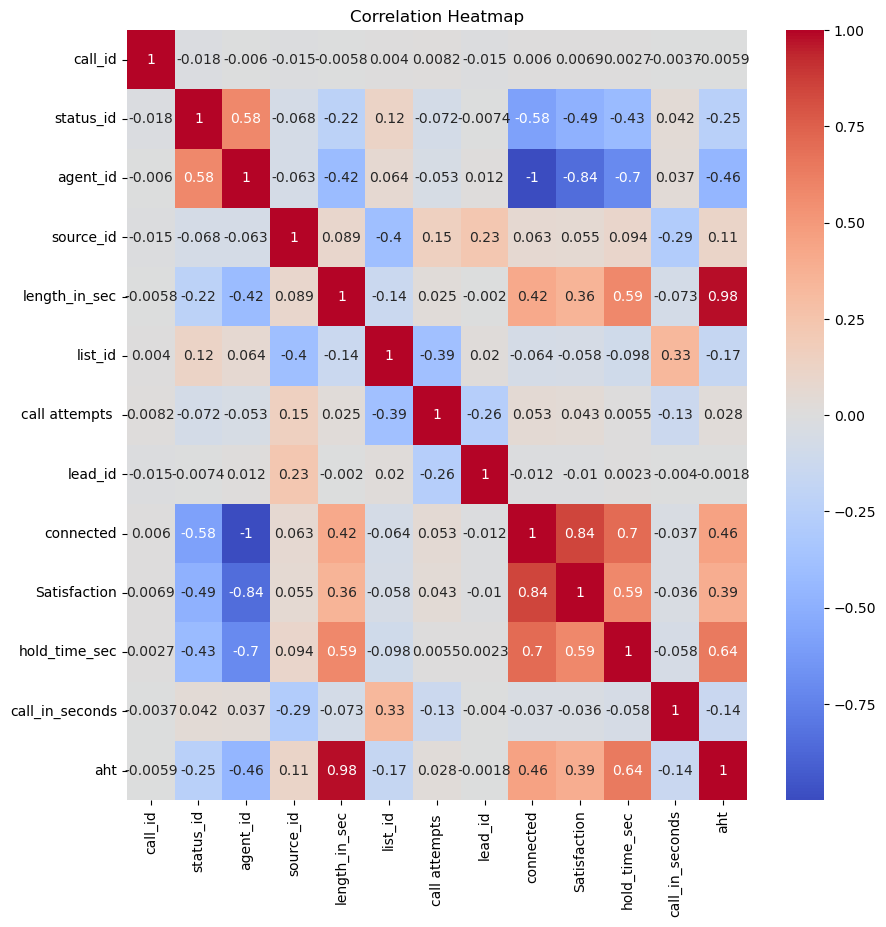

In [215]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [157]:
# Corr between Satisfaction and agent gender 
correlation2 = df_merge['Satisfaction'].corr(df_merge['agent_gender'])
print("Correlation between Satisfaction and agent_gender:", correlation2)

Correlation between Satisfaction and Hold Time: 0.5854170011990196


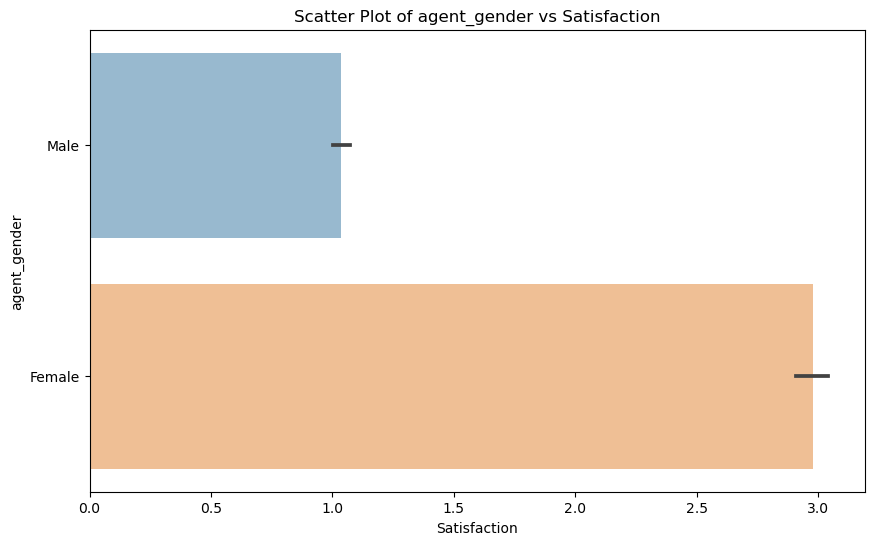

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='Satisfaction', y='agent_gender', alpha=0.5)
plt.title('Scatter Plot of agent_gender vs Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('agent_gender')
plt.show()

In [171]:
# Corr between hold time and call length
summary_stats = df_merge[['hold_time_sec', 'length_in_sec']].describe()
print(summary_stats)

       hold_time_sec  length_in_sec
count   10509.000000   10509.000000
mean        9.822057      50.384432
std        15.078267     130.906221
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%        25.000000      37.000000
max        45.000000    2208.000000


In [172]:
correlation = df_merge['hold_time_sec'].corr(df_merge['length_in_sec'])
print("Correlation between Hold Time and Call Length:", correlation)

Correlation between Hold Time and Call Length: 0.5854317330309202


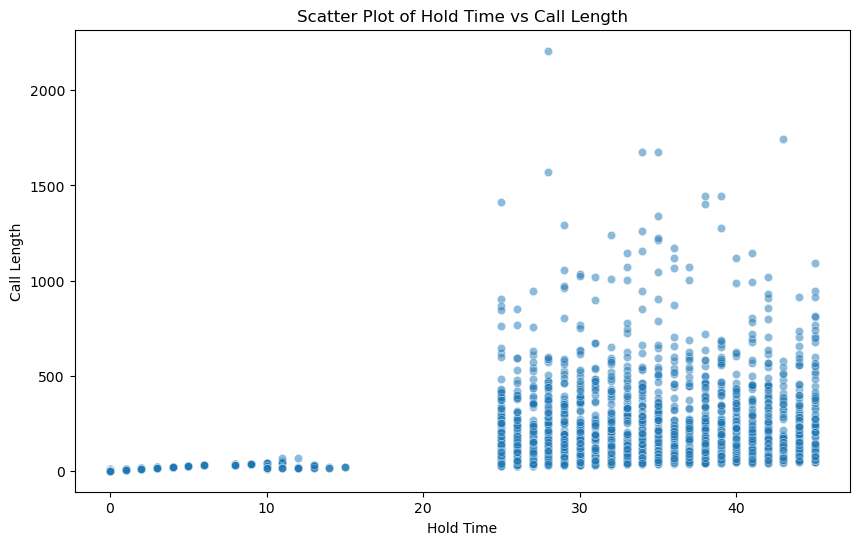

In [218]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merge, x='hold_time_sec', y='length_in_sec', alpha=0.5)
plt.title('Scatter Plot of Hold Time vs Call Length')
plt.xlabel('Hold Time')
plt.ylabel('Call Length')
plt.show()

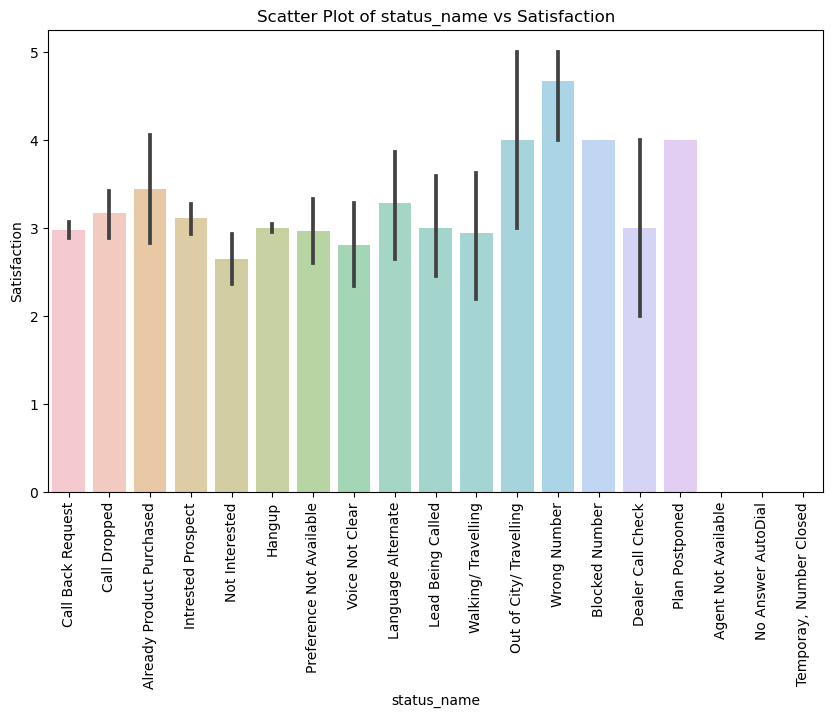

In [187]:
# Relation between status name and satisfaction
plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='status_name', y='Satisfaction', alpha=0.5)
plt.title('Scatter Plot of status_name vs Satisfaction')
plt.xlabel('status_name')
plt.xticks(rotation=90)
plt.ylabel('Satisfaction')
plt.show()

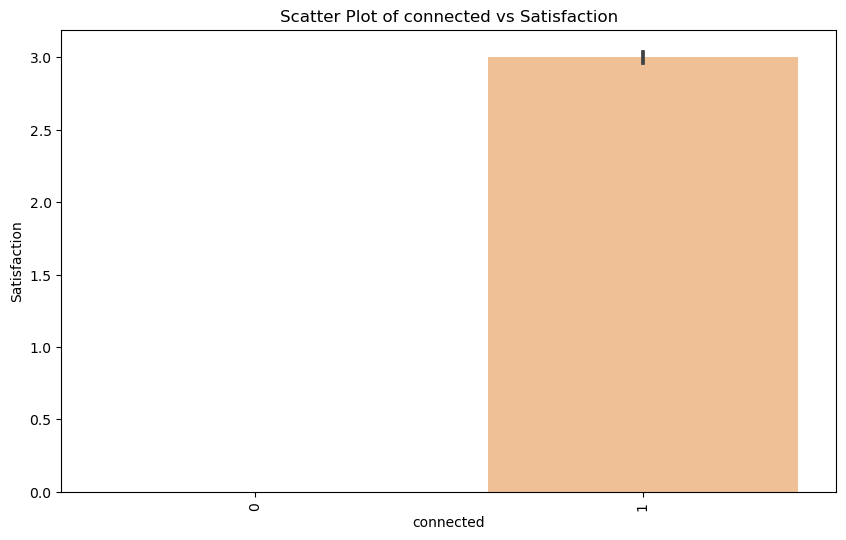

In [208]:
# Relation between connected and satisfaction
plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='connected', y='Satisfaction', alpha=0.5)
plt.title('Scatter Plot of connected vs Satisfaction')
plt.xlabel('connected')
plt.xticks(rotation=90)
plt.ylabel('Satisfaction')
plt.show()

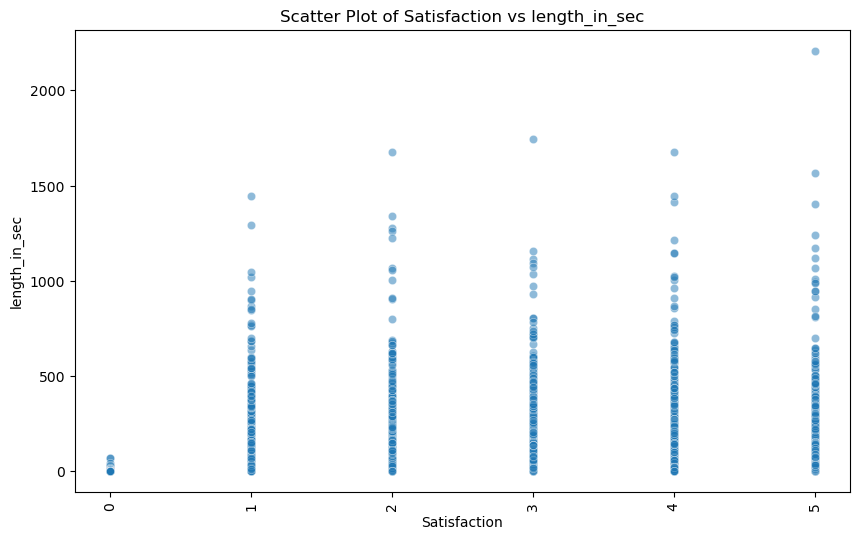

In [211]:
# Relation between length and satisfaction
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merge, x='Satisfaction', y='length_in_sec', alpha=0.5)
plt.title('Scatter Plot of Satisfaction vs length_in_sec')
plt.xlabel('Satisfaction')
plt.xticks(rotation=90)
plt.ylabel('length_in_sec')
plt.show()

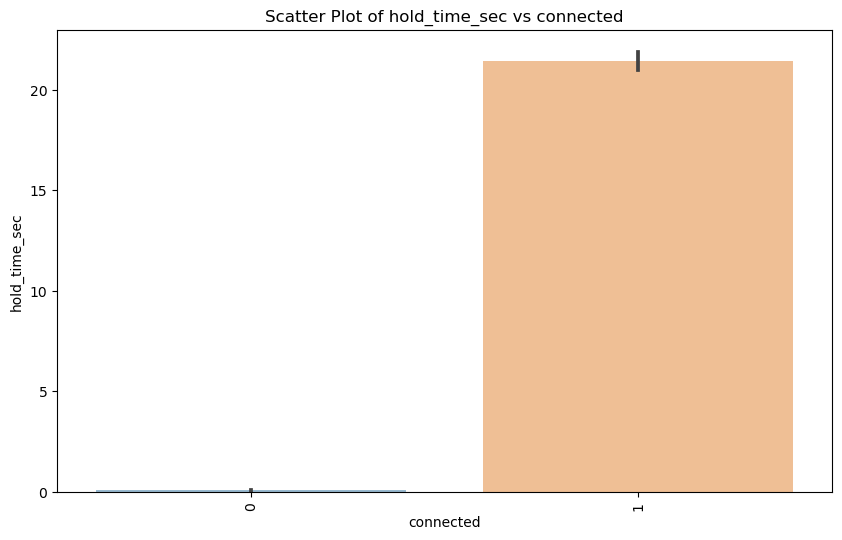

In [216]:
# Relation between hold_time_sec and connected
plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='connected', y='hold_time_sec', alpha=0.5)
plt.title('Scatter Plot of hold_time_sec vs connected')
plt.xlabel('connected')
plt.xticks(rotation=90)
plt.ylabel('hold_time_sec')
plt.show()

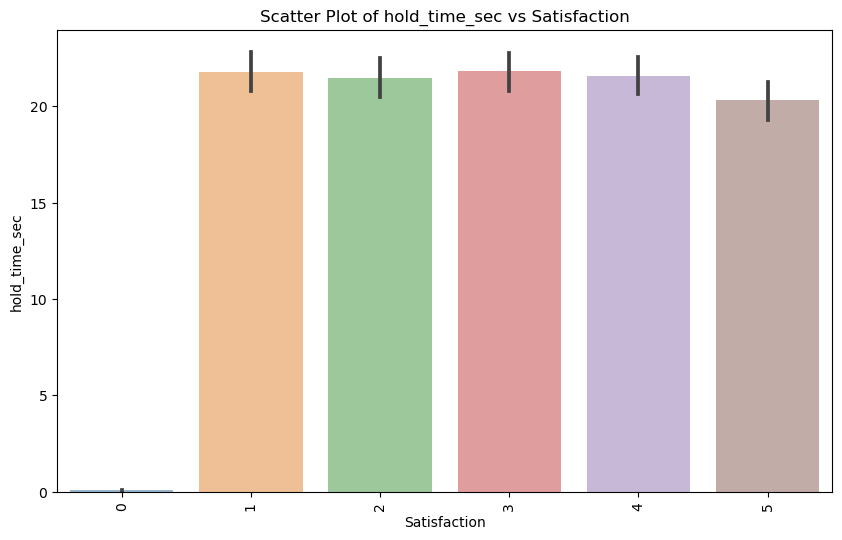

In [213]:
# Relation between hold_time_sec and Satisfactrion
plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='Satisfaction', y='hold_time_sec', alpha=0.5)
plt.title('Scatter Plot of hold_time_sec vs Satisfaction')
plt.xlabel('Satisfaction')
plt.xticks(rotation=90)
plt.ylabel('hold_time_sec')
plt.show()

,call_id,status_id,agent_id,source_id,length_in_sec,list_id,call attempts,lead_id,connected,Satisfaction,hold_time_sec,call_in_seconds,aht
call_id,1.000000,-0.017762,-0.006045,-0.015486,-0.005763,0.004022,0.008206,-0.015280,0.006044,0.006924,0.002730,-0.003744,-0.005935
status_id,-0.017762,1.000000,0.584571,-0.067622,-0.224657,0.123003,-0.071730,-0.007403,-0.584579,-0.485429,-0.428528,0.042330,-0.249519
agent_id,-0.006045,0.584571,1.000000,-0.062897,-0.418095,0.063660,-0.053409,0.011817,-1.000000,-0.844133,-0.704778,0.036773,-0.456862
source_id,-0.015486,-0.067622,-0.062897,1.000000,0.088978,-0.398220,0.148486,0.233241,0.062910,0.055064,0.094273,-0.285902,0.110276
length_in_sec,-0.005763,-0.224657,-0.418095,0.088978,1.000000,-0.136357,0.024894,-0.001970,0.418095,0.359263,0.585432,-0.072575,0.981330
list_id,0.004022,0.123003,0.063660,-0.398220,-0.136357,1.000000,-0.387778,0.020058,-0.063690,-0.057790,-0.098374,0.330135,-0.165399
call attempts,0.008206,-0.071730,-0.053409,0.148486,0.024894,-0.387778,1.000000,-0.260319,0.053416,0.042597,0.005471,-0.127833,0.027617
lead_id,-0.015280,-0.007403,0.011817,0.233241,-0.001970,0.020058,-0.260319,1.000000,-0.011821,-0.010114,0.002303,-0.004041,-0.001803
connected,0.006044,-0.584579,-1.000000,0.062910,0.418095,-0.063690,0.053416,-0.011821,1.000000,0.844135,0.704783,-0.036776,0.456864
Satisfaction,0.006924,-0.485429,-0.844133,0.055064,0.359263,-0.057790,0.042597,-0.010114,0.844135,1.000000,0.585417,-0.035808,0.390716
